In [178]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
class Agent:
    
    def __init__(self, id, steps_till_cure, infected = False):
        self.id = id
        self.infected = infected
        self.steps_till_cure = steps_till_cure
        self.steps_infected = 0
        
        '''Adds +1 to infested steps couinter if infested on creation'''
        if self.infected:
            self.steps_infected += 1
            
        
    def hand_shake(self, other_agent):
        if self.steps_infected >= self.steps_till_cure or \
        other_agent.steps_infected >= other_agent.steps_till_cure:
            pass
        else:
            if other_agent.infected == True:
                self.infected = True
            elif self.infected == True:
                other_agent.infected = True


In [180]:
class Model:
    
    def __init__(self, num_agents, num_infected, steps_till_cure, contact_koef):
        
        self.num_agents = num_agents
        self.num_infected = num_infected
        self.num_cured = 0
        self.K = contact_koef #Between 0..1
        self.dict_agents = {}
        self.infected_vector = np.array([num_infected], int) #For recording num_infected in all steps
        self.cured_vector = np.array([self.num_cured], int)
        
        '''Creats agents and puts them in dictionary'''
        start_num_infected = num_infected
        for i in range(self.num_agents):
            if start_num_infected > 0:
                agent = Agent(i, steps_till_cure, True)
                start_num_infected -= 1
            else:
                agent = Agent(i, steps_till_cure)
            self.dict_agents[agent.id] = agent
  
    def step(self):
        '''Advance the model by one step.'''
        key_list = list(self.dict_agents.keys())
        random.shuffle(key_list) #Shuffles indexes to pick random pairs each step
        
        '''Handshakes betwen pairs of agents depending on contact_koef - K'''
        for i in range(int(len(key_list)*self.K//2)):
            hand_shaker_1 = self.dict_agents[key_list.pop()]
            hand_shaker_2 = self.dict_agents[key_list.pop()]
            hand_shaker_1.hand_shake(hand_shaker_2)
        
        '''Counts how long agent is infected and number of cured after step'''
        self.num_cured = 0
        for agent in self.dict_agents.values():
            if agent.infected == True and agent.steps_infected < agent.steps_till_cure:
                agent.steps_infected += 1
            elif agent.steps_infected == agent.steps_till_cure:
                agent.infected = False
                self.num_cured += 1
        self.cured_vector = np.append(self.cured_vector, self.num_cured)
        
        '''Counts number of infected after step'''
        self.num_infected = 0
        for agent in self.dict_agents.values():
            if agent.infected: self.num_infected +=1
        self.infected_vector = np.append(self.infected_vector, self.num_infected)
    
    def run_simulation(self, num_steps):
        self.num_steps = num_steps
        for i in range(self.num_steps):
            self.step()
    
    def draw_plot(self, num_steps):
        x = np.arange(0, num_steps+1)
        plt.figure(figsize=(10,6))
        plt.style.use('seaborn-white')
        plt.plot(x, New_Model.infected_vector, color='r', label='Infected', linewidth=2)
        plt.plot(x, New_Model.num_agents - New_Model.infected_vector, color='g', label='Healthy', linestyle='--', linewidth=1)
        plt.plot(x, New_Model.cured_vector, color='b', label='Cured', linestyle='-.', linewidth=1.5)
        plt.xlabel('Steps')
        plt.ylabel('Number of Infected')
        plt.legend()
        plt.grid(True)


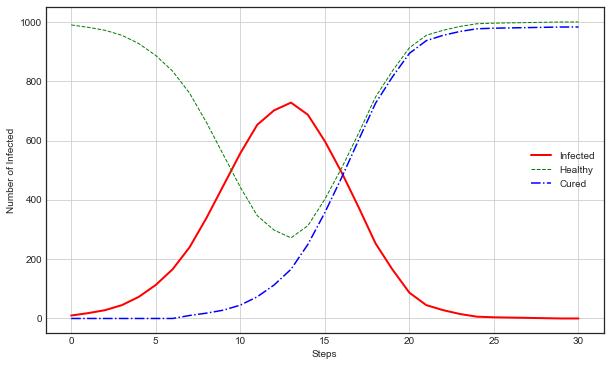

In [182]:
New_Model = Model(1000, num_infected = 11, steps_till_cure = 7, contact_koef = .6)
    
steps = 30
New_Model.run_simulation(steps)
New_Model.draw_plot(steps)

